# Análisis de sentimiento con representaciónes simbólicas.
Jahzeel Ulises Méndez Diaz

In [1]:
import pandas as pd

df = pd.read_pickle("merged_training.pkl")
df

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
...,...,...
566,that was what i felt when i was finally accept...,joy
36236,i take every day as it comes i m just focussin...,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [2]:
#Classes 
import numpy as np

np.unique(df['emotions'])

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [3]:
poems = df[(df["emotions"] == 'joy') | (df["emotions"] == 'sadness')]
poems

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
10714,i am one of those people who feels like going ...,joy
...,...,...
19091,i do feel my body aching dying crying for slee...,sadness
566,that was what i felt when i was finally accept...,joy
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [4]:
from nltk.tokenize import word_tokenize
sents = [word_tokenize(sent) for sent in poems['text']]

In [5]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=sents, vector_size=100, window=5, min_count=1, workers=4)

In [6]:
#Getting centroids of the texts
X = []
for sent in poems['text']:
    tokens = word_tokenize(sent)
    centroid = np.zeros((100,))
    for token in tokens:
        vector = model.wv.get_vector(token)
        centroid += vector
    centroid = centroid/len(tokens)
    X.append(centroid)
X = np.array(X)

In [7]:
y = np.array(poems["emotions"])

In [8]:
from pyts.classification import SAXVSM
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

clf = SAXVSM(window_size=34, sublinear_tf=False, use_idf=False)
clf.fit(X_train, y_train)

SAXVSM(sublinear_tf=False, use_idf=False, window_size=34)

In [9]:
clf.score(X_train[:200,:],y_train[:200])

0.93

In [10]:
predicted = clf.predict(X_test[:200,:])

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test[:200],predicted))

              precision    recall  f1-score   support

         joy       0.76      0.71      0.74       104
     sadness       0.71      0.76      0.73        96

    accuracy                           0.73       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.74      0.73      0.74       200



In [ ]:
import os

path = "audios/Audio_Files/Audio_Files/Test/Happy"
happy = os.listdir(path)
len(happy)

110

In [ ]:
path = "audios/Audio_Files/Audio_Files/Test/Sad"
sad = os.listdir(path)
len(sad)

['Sad46000.wav',
 'Sad46001.wav',
 'Sad46002.wav',
 'Sad46003.wav',
 'Sad46004.wav',
 'Sad46005.wav',
 'Sad46006.wav',
 'Sad46007.wav',
 'Sad46008.wav',
 'Sad46009.wav',
 'Sad46010.wav',
 'Sad46011.wav',
 'Sad46012.wav',
 'Sad46013.wav',
 'Sad46014.wav',
 'Sad46015.wav',
 'Sad46016.wav',
 'Sad46017.wav',
 'Sad46018.wav',
 'Sad46019.wav',
 'Sad46020.wav',
 'Sad46200.wav',
 'Sad46201.wav',
 'Sad46202.wav',
 'Sad46203.wav',
 'Sad46204.wav',
 'Sad46205.wav',
 'Sad46206.wav',
 'Sad46207.wav',
 'Sad46208.wav',
 'Sad46209.wav',
 'Sad46210.wav',
 'Sad46211.wav',
 'Sad46212.wav',
 'Sad46213.wav',
 'Sad46214.wav',
 'Sad46215.wav',
 'Sad46216.wav',
 'Sad46217.wav',
 'Sad46218.wav',
 'Sad46219.wav',
 'Sad46220.wav',
 'Sad46700.wav',
 'Sad46701.wav',
 'Sad46702.wav',
 'Sad46703.wav',
 'Sad46704.wav',
 'Sad46705.wav',
 'Sad46706.wav',
 'Sad46707.wav',
 'Sad46708.wav',
 'Sad46709.wav',
 'Sad46710.wav',
 'Sad46711.wav',
 'Sad46712.wav',
 'Sad46713.wav',
 'Sad46714.wav',
 'Sad47200.wav',
 'Sad47201.wav

In [55]:
from scipy.io import wavfile
import librosa
path_wav = "audios/Audio_Files/Audio_Files/Test/Happy/Happy43603.wav"
signal_, sr = librosa.load(path_wav, sr=1000)

In [56]:
len(signal_),sr

(10005, 1000)

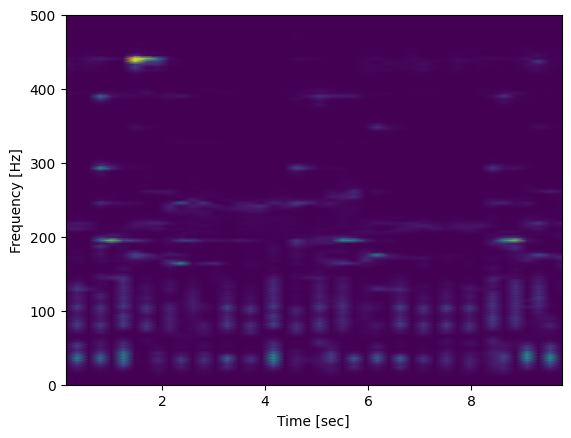

In [57]:
from scipy import signal
from matplotlib import pyplot as plt

f, t, Sxx = signal.spectrogram(signal_, sr)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()